# VSWR and circles on the Smith chart

This notebook explains how **Voltage Standing Wave Ratio (VSWR)** relates to the Smith chart and how to plot VSWR circles with `pysmithchart`.

You will learn:

- The relationship between VSWR and reflection coefficient magnitude \(|\Gamma|\)
- Why VSWR circles are **centered at the chart center** (matched point)
- How to read VSWR on the horizontal axis
- How to plot VSWR circles and label them

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pysmithchart
from pysmithchart.constants import IMPEDANCE_DOMAIN, REFLECTANCE_DOMAIN, ABSOLUTE_DOMAIN
from pysmithchart import utils

## 1. VSWR and $|\Gamma|$

VSWR is defined from the standing-wave ratio on a transmission line:

$$
\mathrm{VSWR} = \frac{V_{\max}}{V_{\min}}
$$

For a single reflection coefficient magnitude $|\Gamma|$ (lossless line), the relationship is:

$$
\mathrm{VSWR} = \frac{1+|\Gamma|}{1-|\Gamma|}
\qquad \Longleftrightarrow \qquad
|\Gamma| = \frac{\mathrm{VSWR}-1}{\mathrm{VSWR}+1}
$$

So a **constant VSWR** corresponds to a **constant \(|\Gamma|\)**.

In [2]:
vswrs = np.array([1.0, 1.5, 2.0, 3.0, 5.0, 10.0])
rho = utils.calc_rho(vswrs)  # rho = |Gamma|

list(zip(vswrs, rho))

[(np.float64(1.0), np.float64(0.0)),
 (np.float64(1.5), np.float64(0.2)),
 (np.float64(2.0), np.float64(0.3333333333333333)),
 (np.float64(3.0), np.float64(0.5)),
 (np.float64(5.0), np.float64(0.6666666666666666)),
 (np.float64(10.0), np.float64(0.8181818181818182))]

## 2. Why VSWR circles are circles

In the \(\Gamma\)-plane, points with constant \(|\Gamma|\) form a circle centered at the origin.

The Smith chart is a mapping between normalized impedance \(z\) and \(\Gamma\):

\[
\Gamma = \frac{z-1}{z+1}
\]

When you draw a constant-\(|\Gamma|\) circle in the \(\Gamma\)-plane and map it onto the Smith chart, you get the familiar **VSWR circle**.

**Important:** On a Smith chart, the center corresponds to \(\Gamma = 0\) (matched load), so VSWR circles are centered on the **matched point**.

## 3. Reading VSWR on the horizontal axis

A VSWR circle intersects the **real axis** at two points (for lossless case). In the impedance view, those intersections correspond to the two real normalized impedances:

\[
r_{\max} = \mathrm{VSWR}, \qquad r_{\min} = \frac{1}{\mathrm{VSWR}}
\]

So, when you look at the right intersection of a VSWR circle on the horizontal axis, the value of \(r\) there equals the VSWR.

This is one reason it can *look like* “the circle tells you VSWR directly” on the axis: it does.

In [3]:
vswr = 3.0
r_max = vswr
r_min = 1 / vswr
r_max, r_min

(3.0, 0.3333333333333333)

## 4. Plot VSWR circles with `pysmithchart`

`pysmithchart` provides `ax.plot_vswr(v)` to draw a VSWR circle.

Below we plot a few circles and label them.

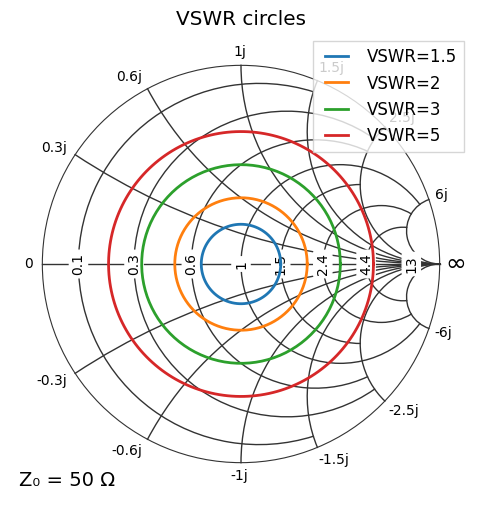

In [4]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith")

for v in [1.5, 2, 3, 5]:
    ax.plot_vswr(v, ms=0, lw=2, label=f"VSWR={v:g}")

ax.legend(loc="upper right")
ax.set_title("VSWR circles")
plt.show()

## 5. The same circles shown in Γ coordinates

Because VSWR is fundamentally about Γ, it is useful to see the same circles in the reflection-coefficient domain.

In `REFLECTANCE_DOMAIN`, the Smith chart data coordinates are Γ.
So a VSWR circle is simply a circle of radius $\rho = |\Gamma|$.

Below we draw the circle "manually" in Γ-space and confirm it matches `plot_vswr`.

0.5


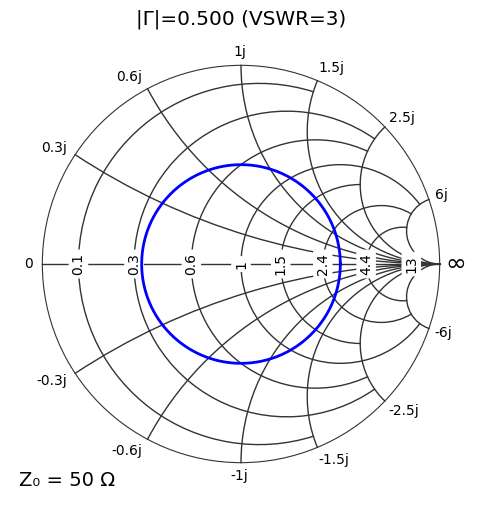

In [12]:
v = 3.0
rho = utils.calc_rho(v)
print(rho)


plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", domain=REFLECTANCE_DOMAIN)

theta = np.linspace(0, 2 * np.pi, 400)
Gamma_circle = rho * np.exp(1j * theta)

ax.plot(Gamma_circle, "b")
ax.set_title(f"|Γ|={rho:.3f} (VSWR={v:g})")
plt.show()

## 6. VSWR for a point (and common misconceptions)

Given a complex impedance, VSWR depends on how far that point is from the match in the \(\Gamma\) sense.

A common misconception is:
- “VSWR circle is centered on 1 (ohms).”

More precisely:
- The circles are centered on the **matched point** \(z=1+j0\) (normalized).
- In `IMPEDANCE_DOMAIN`, that is \(Z = Z_0\).
- In \(\Gamma\)-space, the center is \(\Gamma=0\).

Below we compute VSWR for a sample impedance and show its circle.

In [14]:
Z0 = 50
ZL = 100 + 1j * 25

Gamma = utils.calc_gamma(Z0, ZL)
vswr = utils.calc_vswr(Z0, ZL)

Gamma, vswr

((0.35135135135135137+0.10810810810810813j), 2.162591906795965)

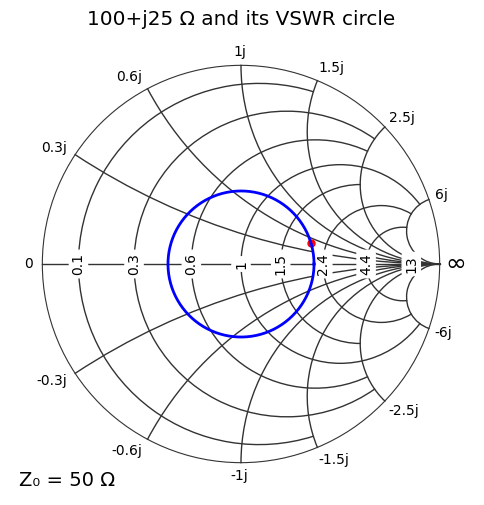

In [22]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", Z0=Z0)

ax.plot(ZL, "ro", label=f"ZL={ZL.real:.0f}+j{ZL.imag:.0f} Ω")
ax.plot_vswr(vswr, "b", label=f"VSWR={vswr:.2f}")

ax.set_title(f"{ZL.real:.0f}+j{ZL.imag:.0f} Ω and its VSWR circle")
plt.show()

## 7. Summary

- VSWR is determined by \(|\Gamma|\): \(\mathrm{VSWR} = \frac{1+|\Gamma|}{1-|\Gamma|}\).
- Constant VSWR corresponds to a circle of constant \(|\Gamma|\).
- VSWR circles are centered on the matched point (\(\Gamma=0\), \(z=1\)).
- On the real axis, a VSWR circle intersects at \(r=\mathrm{VSWR}\) and \(r=1/\mathrm{VSWR}\).

Next recommended notebook: **rotations_and_transmission_lines**.